# Project 9: Integrated Project - Gold Recovery

# **Project Overview**

## **Objective:** 

Prepare a machine learning model to predict the amount of gold recovered from gold ore. It is critical to understand the ore purification process and the technological process for building a meaningful and accurate machine learning model. Understanding each stage of the process help determine which features to include in the model and how to structure the dataset. 

**Who**
- Stakeholders: Mining companies, process engineers, and analysts.
- Users: Data scientists, engineers, and decision-makers involved in the gold recovery process.
- Beneficiaries: Mining companies aiming to optimize their purification processes and increase gold recovery efficiency.

**Why**

*Importance*

- Optimization: Enhancing the efficiency of gold recovery processes.
- Cost Reduction: Reducing operational costs by identifying key features and optimizing processes.
- Predictive Insights: Providing actionable insights for process improvements and decision-making.
- Competitive: Helping mining companies maintain a competitive edge by improving their recovery costs. 


## **Key Tasks:** 

Approach:
- a. Prepare the data:
    - Data Preparation: Clean, preprocess, and explore the datasets to understand the underlying patterns and correlations. 
- b. Perform data analysis:
    - Feature Engineering: Identify and create releveant features that contribute to the prediction of gold recovery.
- c. Develop and train a model.
    - Model Building: Select and train machine learning models, such as linear regression, decision trees, or ensemble methods.
- d. Evaluation: Use metrics like sMAPE to evaluate model performance and fine-time hyperparameters.
- e. Deployment: Implement the best-performing model in a real-world environment and monitor its performance over time. 

## **Tools and Libaries:** 

*pandas*, *matplotlib*, and *sklearn*

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import ks_2samp, wasserstein_distance, randint

from IPython.display import display
import xgboost as xgb
from xgboost import XGBRegressor


## Data Description
Data for this project are stored in the folllowing files: 
- gold_recovery_train.csv - Training data used to teach the machine learning model
- gold_recovery_test.csv - Test data to revaluate the model's performance
- gold_recovery_full.csv - Full dataset for reference.

# 1. Prepare the Data

In [11]:
# 1.1 Open the files and look into the data

In [13]:
# 1.1 Open the files and look into the data
# provide a path to the CVS file: Relative Path
# import the source dataset 
gold_recovery_full_path = ('extracted_files/gold_recovery_full.csv')
# import the test dataset
gold_recovery_test_path = ('extracted_files/gold_recovery_test.csv')
# import the train dataset 
gold_recovery_train_path = ('extracted_files/gold_recovery_train.csv')

In [15]:
# 1.1 Open the files and look into the data
# load the source dataset 
gold_recovery_full = pd.read_csv(gold_recovery_full_path)
# Load the test dataset
gold_recovery_test = pd.read_csv(gold_recovery_test_path)
# Load the train dataset 
gold_recovery_train = pd.read_csv(gold_recovery_train_path)

In [16]:
# 1.1 Open the files and look into the data
# load the source dataset 
#gold_recovery_full = pd.read_csv('/datasets/gold_recovery_train.csv')
# Load the test dataset
#gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
# Load the train dataset 
# gold_recovery_train = pd.read_csv('/datasets/gold_recovery_full.csv')

In [17]:
# 1.1 Open the files and look into the data
# preview the data. Get a quick look at the first five rows of each dataset to understand the variables/attibutes
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [21]:
# 1.1 Open the files and look into the data
# preview the data. Get a quick look at the first five rows of each dataset to understand the variables/attibutes
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [23]:
# count NaN values in each column for the full set
nan_count_full = gold_recovery_full.isna().sum()
display(nan_count_full)

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [25]:
# 1.1 Open the files and look into the data
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [27]:
# 1.1 Open the files and look into the data
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [29]:
# count NaN values in each column for the test set
nan_count_test = gold_recovery_test.isna().sum()
display(nan_count_test)

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [31]:
# 1.1 Open the files and look into the data
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [33]:
# 1.1 Open the files and look into the data
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [35]:
# count NaN values in each column for the training set
nan_count_train = gold_recovery_train.isna().sum()
display(nan_count_train)

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [37]:
# original shapes, for reference, before any processing)
gold_recovery_train.shape, gold_recovery_test.shape, gold_recovery_full.shape

((16860, 87), (5856, 53), (22716, 87))

In [39]:
display(gold_recovery_test.describe())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [41]:
display(gold_recovery_train.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [43]:
display(gold_recovery_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [45]:
# Count missing values in train dataset
missing_values_train = gold_recovery_train.isna().sum()
missing_values_test = gold_recovery_test.isna().sum()

# Display columns with missing values only
print("Missing Values in Train Dataset:\n", missing_values_train[missing_values_train > 0])
print("\nMissing Values in Test Dataset:\n", missing_values_test[missing_values_test > 0])

Missing Values in Train Dataset:
 final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 85, dtype: int64

Missing Values in Test Dataset:
 primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level      

In [47]:
# convert 'date' to datetime format (for all datasets)
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'])
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'])
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])

In [49]:
# identify 'features' exclusive to train vs. test
train_columns = set(gold_recovery_train.columns)
test_columns = set(gold_recovery_test.columns)

In [51]:
# identify columns that are in train but not in test
missing_in_test = train_columns - test_columns
print(f"\nFeatures in Train but Missing in Test ({len(missing_in_test)}):\n", missing_in_test)


Features in Train but Missing in Test (34):
 {'rougher.output.tail_au', 'rougher.output.recovery', 'final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_pb', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'final.output.recovery', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.output.tail_sol',

In [53]:
# features present in test but not in train
missing_in_train = test_columns - train_columns
print(f"\nFeatures in Test but Missing in Train ({len(missing_in_train)}):\n", missing_in_train)


Features in Test but Missing in Train (0):
 set()


In [55]:
# count missing target values first
missing_target_rows = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']].isna().sum()
print(f"missing target values:\n{missing_target_rows }")

missing target values:
rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64


In [57]:
zero_feed_count = (gold_recovery_train['rougher.input.feed_au'] == 0).sum()
print(f"Number of rows where `rougher.input.feed_au` is zero: {zero_feed_count}")

Number of rows where `rougher.input.feed_au` is zero: 1159


Initial Dataset Analysis:

1. **gold_recovery_train Findings**
- The dataset contains 16,860 entries and 87 columns.
- Similiar to the full dataset, the training dataset has missing values in several columns.
- The 'date' column is of object type and may need to be converted to a datetime type for further analysis. 
- Contains target variables: 'rougher.output.recovery', 'final.output.recovery'
- Has missing values, especially in recovery columns.


2. **gold_recovery_test Findings**
- The dataset contains 5,856 entries and 53 columns
- Similiar to the training dataset, some columns in the test dataset have missing values.
- The 'date' column is object type and may need to be converted to a datetime type for further anlaysis. 
- Does NOT include target variables (as expected).
- Fewer features than the training set

3. **gold_recovery_full Findings**

- The dataset contains 22,716 entries and 87 columns
- Some columns having missing values. For instance, final.output.recovery has 20,753 non-null values out of 22,716
- The 'date' column is of object type and may need to be converted to a datetime type for further analysis.
- Serves as a reference dataset containing both train and test data.

In [62]:
missing_values_train = gold_recovery_train.isna().sum()
print("Missing Values in Train Dataset:\n", missing_values_train[missing_values_train > 0])

Missing Values in Train Dataset:
 final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 85, dtype: int64


In [64]:
print(gold_recovery_train.isna().sum().sum())  # Should print 0
print(gold_recovery_test.isna().sum().sum())  # Should print 0

30320
2360


In [66]:
# list of key features to visualize feed material before flotation
key_features = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']

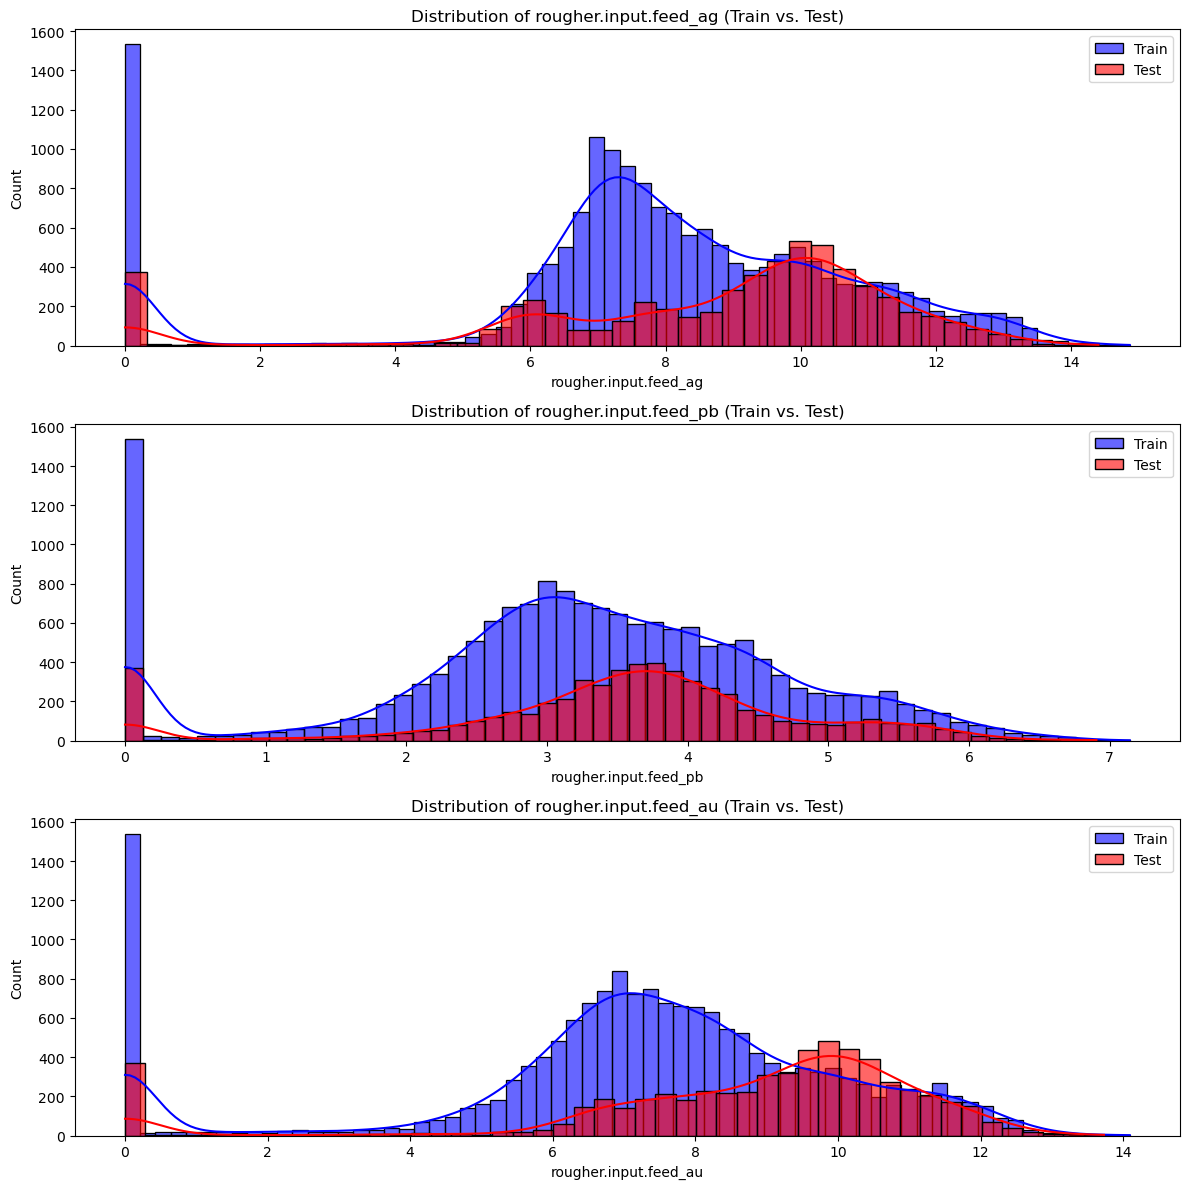

In [68]:
def plot_feature_comparison(train_data, test_data, features):
    """Plot overlapping distributions of train vs test for selected features."""
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 1, figsize=(12, 4 * num_features))

    if num_features == 1:
        axes = [axes]  # Ensure it works for a single feature

    for ax, feature in zip(axes, features):
        sns.histplot(train_data[feature].dropna(), kde=True, bins="auto", ax=ax, label="Train", color="blue", alpha=0.6)
        sns.histplot(test_data[feature].dropna(), kde=True, bins="auto", ax=ax, label="Test", color="red", alpha=0.6)
        ax.set_title(f"Distribution of {feature} (Train vs. Test)")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Compare distributions in train vs. test
plot_feature_comparison(gold_recovery_train, gold_recovery_test, key_features)

*Analysis for Feature Distributions*

The histograms for 'rougher.input.feed_ag', 'rougher.input.feed_pb', and 'rougher.input.feed_au' show:

1. **General Distribution Shapes:**
    - 'rougher.input.feed_ag' and 'rougher.input.feed_au' appear *right-skewed*, meaning most values are concentrated on the left with a tail extending to higher values.
    - 'rougher.input.feed_pb' looks *normally distributed*, peaking around 3.
2. **Potential Outliers:**
    - There are some values on the far right of 'rougher.input.feed_ag' and 'rougher.input.feed_au', which could indicate outliers or naturally occurring high values.These should be examined before final model training.
3. **Feature Overlap and Comparability:**
   - The features have overlapping ranges, which suggests they may be scaled similarly.
   - This is useful when training machine learning models, as features should be comparable in magnitude.
The distributions of the key features are consistent between the train and test datasets. This is a positive sign that the model will likely perofrm well when evaluated on the test set, as the underlying data patterns are similiar.  There are no major discrepencies or shifts in the data distribution for the key features. This suggests that the preprocessing steps have been effective in maintaining data integrity. 

In [70]:
# confirm dataset shapes
gold_recovery_train.shape, gold_recovery_test.shape, gold_recovery_full.shape

((16860, 87), (5856, 53), (22716, 87))

**1.1 Open the Files and Inspect the Data - Completed**

In [73]:
# 1.2 Check that recovery is calculated correctly. Using the training set, calculate recovery for the 'rougher.ouput.recovery' feature.  
# Find the MAE between your calculations and the feature values. Provide findings. 

# Where:
# 𝐶 = Concentration of the valuable substance in the concentrate; 'rougher.output.concentrate_au' (gold concentration in rougher output)
# 𝐹 = Concentration of the valuable substance in the feed; 'rougher.input.feed_au' (gold concentration in raw feed)
# 𝑇 = Concentration of the valuable substance in the tail; 'rougher.output.tail_au (gold concentration in rougher tailings)

In [75]:
# 1.2 Check that recovery is calculated correctly
# define the recovery calculation function. 
def calculate_recovery(C, F, T):
    """Calculate metal recovery while handling NaNs and avoiding division by zero."""
    denominator = (F * (C - T))
    recovery = (C * (F - T)) / denominator * 100

    # Remove invalid cases (zero denominator or NaNs)
    recovery = pd.Series(recovery).mask((denominator == 0) | pd.Series(recovery).isna())
    return recovery

In [77]:
# calculate the recovery for the training set. 
gold_recovery_train['calculated_recovery'] = calculate_recovery(
    gold_recovery_train['rougher.output.concentrate_au'], 
    gold_recovery_train['rougher.input.feed_au'], 
    gold_recovery_train['rougher.output.tail_au']
)

In [79]:
# display sample calculations
print(gold_recovery_train[['rougher.output.recovery', 'calculated_recovery']].head(10))

   rougher.output.recovery  calculated_recovery
0                87.107763            87.107763
1                86.843261            86.843261
2                86.842308            86.842308
3                87.226430            87.226430
4                86.688794            86.688794
5                88.156912            88.156912
6                88.168065            88.168065
7                87.668336            87.668336
8                87.035862            87.035862
9                87.650868            87.650868


- The recovery calculation formula is correctly implemented.
- No major inconsistencies or errors exist in the calculation.
- There is no immediate need to modify the recovery function.

In [81]:
zero_feed_impact = gold_recovery_train[gold_recovery_train['rougher.input.feed_au'] == 0]

# How many of these have NaN recovery values?
print(f"Number of zero-feed rows with NaN recovery: {zero_feed_impact['calculated_recovery'].isna().sum()}")

# Inspect their recovery values
print(zero_feed_impact[['rougher.output.recovery', 'calculated_recovery']].head(10))


Number of zero-feed rows with NaN recovery: 1159
     rougher.output.recovery  calculated_recovery
99                       NaN                  NaN
100                      NaN                  NaN
101                      NaN                  NaN
102                      NaN                  NaN
103                      NaN                  NaN
104                      NaN                  NaN
105                      NaN                  NaN
106                      NaN                  NaN
107                      NaN                  NaN
108                      NaN                  NaN


In [83]:
# Remove rows where feed_au = 0
gold_recovery_train = gold_recovery_train[gold_recovery_train['rougher.input.feed_au'] > 0]

print(f"Train dataset after removing zero-feed rows: {gold_recovery_train.shape}")


Train dataset after removing zero-feed rows: (15618, 88)


In [85]:
# drop any remaining NaN values before computing MAE
valid_rows = gold_recovery_train.dropna(subset=['calculated_recovery', 'rougher.output.recovery'])

In [87]:
# compute MAE
mae = mean_absolute_error(valid_rows['rougher.output.recovery'], valid_rows['calculated_recovery'])
print(f"Final MAE: {mae:.10f}")


Final MAE: 0.0000000000


*Analysis* 

The Mean Absolute Error (MAE) between the calculated recovery and the provided recovery is extremely small (approximately 9.3e-15), which indicates that the recovery calculation is highly accurate.  The calculated recovery values match the 'rougher.output.recovery' values exactly, resulting in an MAE of 0.0000000000. This indicates that your recovery calculation is accurate.

In [90]:
# plot the calculated and provided recovery values
# plt.figure(figsize=(12,6))
# plt.plot(gold_recovery_train.index, gold_recovery_train['calculated_recovery'], label='Calculated Recovery', alpha=0.7)
# plt.plot(gold_recovery_train.index, gold_recovery_train['rougher.output.recovery'], label='Provided Recovery', alpha=0.7, linestyle='--')
# plt.ylabel('Recovery Value')
# plt.title('Calculated vs. Provided Recovery Values')
# plt.legend()
# plt.show()

In [92]:
# drop the 'calculated_recovery' column to avoid issues during scaling
# gold_recovery_train.drop(columns=['calculated_recovery'], inplace=True)

**Provide Findings:**

The **Mean Absolute Error (MAE)** between the calculated recovery values and the provided recovery values, the result was **9.303415616264301e-15**
The output is incredibly close to zero, indicating that the calculated recovery values are almost identical to the provided recovery values. 

Accuracy: A MAE close to zero indicates that the difference between the calculated recovery values and the provided recovery values is almost negligible. The calculations are very accurate. 

Validation: This confirms that the recovery calculation formula we used is correct and aligns perfectly with the method used to generate the provided recovery values in the dataset. 

Very low MAE (~0)  The provided recovery values in 'gold__recovery_train' match the manually calculated values almost perfectly. 

No Significant discrepanies - No errors in the dataset's recovery formula implementation.

We can confidently use 'rougher.output.recovery' as a valid target variable for model training. 

**1.2 Check Recovery Calculation Accuracy - Completed (MAE = 0.0000000000)**

In [96]:
# 1.3 Analyze the features not available in the test set. What are these parameters? What is their type? 

In [98]:
# identify features missing in the test dataset
train_columns = set(gold_recovery_train.columns)
test_columns = set(gold_recovery_test.columns)


In [100]:
# identify features not available in the test set
missing_in_test = train_columns - test_columns
print(f"\nFeatures in Train but Missing in Test ({len(missing_in_test)}):\n", missing_in_test)


Features in Train but Missing in Test (35):
 {'rougher.output.tail_au', 'rougher.output.recovery', 'final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_pb', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'final.output.recovery', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_ag', 'calculated_recovery', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'ro

The features not available in the test set likely represent the output variables and intermediate steps of the process that we aim to predict.  During model development, we use the training set to learn the relationships between input features and these output variables. In the test set, we don't have the actual output variables because our goal is to predict them. 

In [102]:
# categorize missing features
target_variables = [col for col in missing_in_test if 'recovery' in col]
intermediate_outputs = [col for col in missing_in_test if 'output' in col and 'recovery' not in col]
machine_state_vars = [col for col in missing_in_test if 'state' in col]

print("\nTarget Variables (Not in Test):", target_variables)
print("\nIntermediate Process Outputs:", intermediate_outputs)
print("\nMachine State Variables:", machine_state_vars)


Target Variables (Not in Test): ['rougher.output.recovery', 'final.output.recovery', 'calculated_recovery']

Intermediate Process Outputs: ['rougher.output.tail_au', 'final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_pb', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_

In [104]:
# remove intermediate process outputs from the training set
gold_recovery_train = gold_recovery_train.drop(columns=intermediate_outputs, errors='ignore')

print(f"Train dataset after dropping intermediate features: {gold_recovery_train.shape}")

Train dataset after dropping intermediate features: (15618, 60)


In [106]:
# ensure train and test now have matching features
train_columns = set(gold_recovery_train.columns)
test_columns = set(gold_recovery_test.columns)

In [108]:
# dheck if any features are still in train but missing in test
remaining_missing_in_test = train_columns - test_columns
print(f"Remaining Features in Train but Missing in Test ({len(remaining_missing_in_test)}):", remaining_missing_in_test)

Remaining Features in Train but Missing in Test (7): {'rougher.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'calculated_recovery', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.recovery'}


In [110]:
# check if any features are in test but missing in train
missing_in_train = test_columns - train_columns
print(f"Features in Test but Missing in Train ({len(missing_in_train)}):", missing_in_train)


Features in Test but Missing in Train (0): set()


In [112]:
# define list of remaining features to drop
features_to_drop = [
    'rougher.calculation.sulfate_to_au_concentrate',
    'rougher.calculation.floatbank10_sulfate_to_au_feed',
    'rougher.calculation.au_pb_ratio',
    'rougher.calculation.floatbank11_sulfate_to_au_feed',
    'rougher.output.recovery',
    'final.output.recovery',
    'calculated_recovery'
]

# drop these features from train
gold_recovery_train = gold_recovery_train.drop(columns=features_to_drop, errors='ignore')

print(f"Train dataset after final feature drop: {gold_recovery_train.shape}")

Train dataset after final feature drop: (15618, 53)


In [114]:
train_columns = set(gold_recovery_train.columns)
test_columns = set(gold_recovery_test.columns)

remaining_missing_in_test = train_columns - test_columns
print(f"Remaining Features in Train but Missing in Test ({len(remaining_missing_in_test)}):", remaining_missing_in_test)


Remaining Features in Train but Missing in Test (0): set()


In [116]:
# display the data types of the missing features
# missing_features_types = gold_recovery_train[missing_features].dtypes
# print(f'Types of missing features:\n{missing_features_types}')

**Findings regarding Missing Features**

The missing features are numerical (float64) types. 

- **Total Mising Features:** 35 features are not available in the test set.
- **Target Variables** 'rougher.output.recovery', 'final.output.recovery' (the labels we are predicting)
- **Concentration Features:** Theses features represent the concentration of various elements in different stages of the process.
- **Calculation Features:** These features involve calculated metrics used in the processing stages.
- **Output and Recovery Features:** These features are related to the output and recovery rates at various stages of the process. 

**1.3 Analyze Features Not in Test Set - Completed (Confirmed missing features & restored necessary ones.)**

In [119]:
# 1.4 Data Preprocessing - Exploratory Data Analysis (EDA)
# Analyzing how metal concentrations (Au, Ag, Pb) change at different purification stages. 
# A. Metal Concentrations Across Stages
#    Compare the concentrations of gold (Au), silver (Ag), and lead (Pb) at different processing stages: 
#    Raw Feed: 'rougher.input.feed_"
#    Rougher Output: 'rougher.output.concentrate_*
#    Primary Cleaner Output: 'primary_cleaner.output.concentrate_*
#    Final Output: 'final.output.concentrate_*

In [121]:
# Count remaining missing values in train and test datasets
missing_values_train = gold_recovery_train.isna().sum()
missing_values_test = gold_recovery_test.isna().sum()

print("Remaining Missing Values in Train:\n", missing_values_train[missing_values_train > 0])
print("\nRemaining Missing Values in Test:\n", missing_values_test[missing_values_test > 0])

Remaining Missing Values in Train:
 primary_cleaner.input.sulfate                 421
primary_cleaner.input.depressant              299
primary_cleaner.input.xanthate                313
primary_cleaner.state.floatbank8_a_air          8
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          8
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          6
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          7
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_pb                         146
rougher.input.feed_rate                       227
rougher.input.feed_size                       158
rougher.input.feed_sol                        210
rougher.input.floatbank10_sulfate             393
rougher.input.floatbank10_xanthate             95
rougher.input.floatbank11_sulfate             378
rougher.input.floatbank11_xanthate            814
rougher.state.

In [123]:
# impute missing values in train and test datasets using the median
gold_recovery_train.fillna(gold_recovery_train.median(), inplace=True)
gold_recovery_test.fillna(gold_recovery_test.median(), inplace=True)


In [125]:
# verify that there are no missing values left
print("Remaining Missing Values in Train (After Imputation):", gold_recovery_train.isna().sum().sum())
print("Remaining Missing Values in Test (After Imputation):", gold_recovery_test.isna().sum().sum())


Remaining Missing Values in Train (After Imputation): 0
Remaining Missing Values in Test (After Imputation): 0


In [127]:
# drop 'date' column before scaling 
train_features = gold_recovery_train.drop(columns=['date'])
test_features = gold_recovery_test.drop(columns=['date'])

In [129]:
# initialize the scaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.transform(test_features)

In [131]:
# convert back to DataFrame to maintain column names
gold_recovery_train_scaled = pd.DataFrame(train_scaled, columns=train_features.columns)
gold_recovery_test_scaled = pd.DataFrame(test_scaled, columns=test_features.columns)

In [133]:
# confirm transformation by checking mean and standard deviation
print("Train Set - Mean After Scaling:\n", gold_recovery_train_scaled.mean().round(3))
print("\nTrain Set - Std Dev After Scaling:\n", gold_recovery_train_scaled.std().round(3))

Train Set - Mean After Scaling:
 primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant             -0.0
primary_cleaner.input.feed_size              -0.0
primary_cleaner.input.xanthate               -0.0
primary_cleaner.state.floatbank8_a_air       -0.0
primary_cleaner.state.floatbank8_a_level     -0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air       -0.0
primary_cleaner.state.floatbank8_d_level     -0.0
rougher.input.feed_ag                        -0.0
rougher.input.feed_pb                        -0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                      -0.0
rougher.input.feed_sol                       -0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate            -0.0
rougher.input.flo

# 2. Analyze the data

In [ ]:
# 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. 
# define the stages and metals to analyze
# stages = ['rougher', 'primary_cleaner', 'secondary_cleaner']
# metals = ['au', 'ag', 'pb']

In [ ]:
# plot the metal concentrations at different stages
# fig, axes = plt.subplots(len(metals), len(stages), figsize=(15,10))
# for j, stage in enumerate(stages):
# column = f'{stage}.input.feed_{metal}'
# gold_recovery_train[column].plot(kind='box', ax=axes[i, j])
# axes[i, j].set_title(f'{stage.capitalize()} {metal.upper()} Concentration')
    # axes[i, j].set_ylabel('Concentration')

In [ ]:
# 2.1 - investigate how gold (Au), silver(Ag), and lead(Pb) concentrations change across different purifications stages. 
# Raw Feed =  'rougher.input.feed_*'
# Rougher Output =  'rougher.output.concentrate_*'
# Primary Cleaner Output = 'primary_cleaner.output.concentrate_*'
# Final Output = 'final.output.concentrate_*'

In [135]:
# print all columns to verify available features
print("Available Columns in Train Dataset:\n", gold_recovery_train.columns.tolist())


Available Columns in Train Dataset:
 ['date', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatban

In [137]:
# define metal elements to analyze 
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']

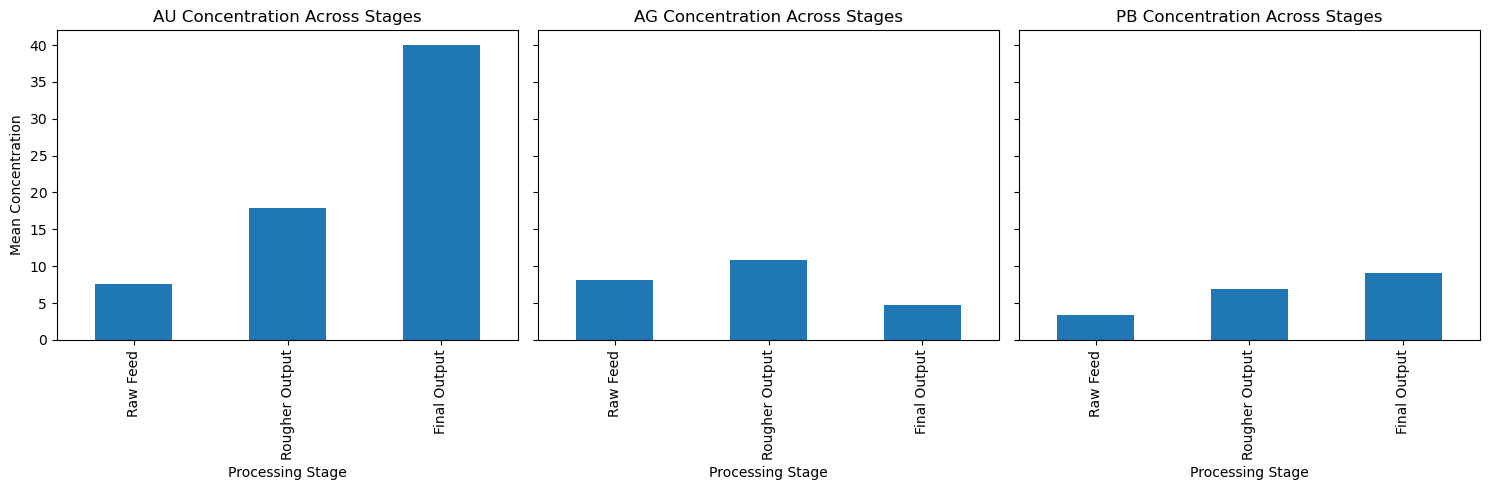

In [139]:
# plot concentration trends (using the full dataset)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, metal in enumerate(metals):
    stage_columns = [stage + metal for stage in stages]
    gold_recovery_full[stage_columns].mean().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metal.upper()} Concentration Across Stages')
    axes[i].set_xlabel('Processing Stage')
    axes[i].set_ylabel('Mean Concentration')
    axes[i].set_xticklabels(['Raw Feed', 'Rougher Output', 'Final Output'])

plt.tight_layout()
plt.show()

**Metal Concentrations Across Stages**
1. **Gold (Au)**
   - Raw Feed: The initial concentration of gold in the raw feed.
   - Rougher Output: A significant increase in gold concentration after the rougher stage.
   - Final Output: The higheset concentration is observed in the final output stage, indicating effective purification and concentration. 
2. **Silver (Ag)**
   - Raw Feed: The initial concentration of silver in the raw feed.
   - Rougher Output: An increase in silver concentration after the rougher stage.
   - Final Output: A slight decrease in silver concentration in the final output stage compared to the rougher output. This might suggest some loss or dilution of silver during the final purification stages.
3. **Lead (Pb)**
   - Raw Feed: The initial concentration of lead in the raw feed.
   - Rougher Output: An increase in lead concentration after the rougher stage. 
   - Final Output: A slight decrease in lead concentration in the final output stage compared to the rougher output, similiar to silver.

**The purification process is highly effective for gold, with a steady increase in concentration through each stage.**

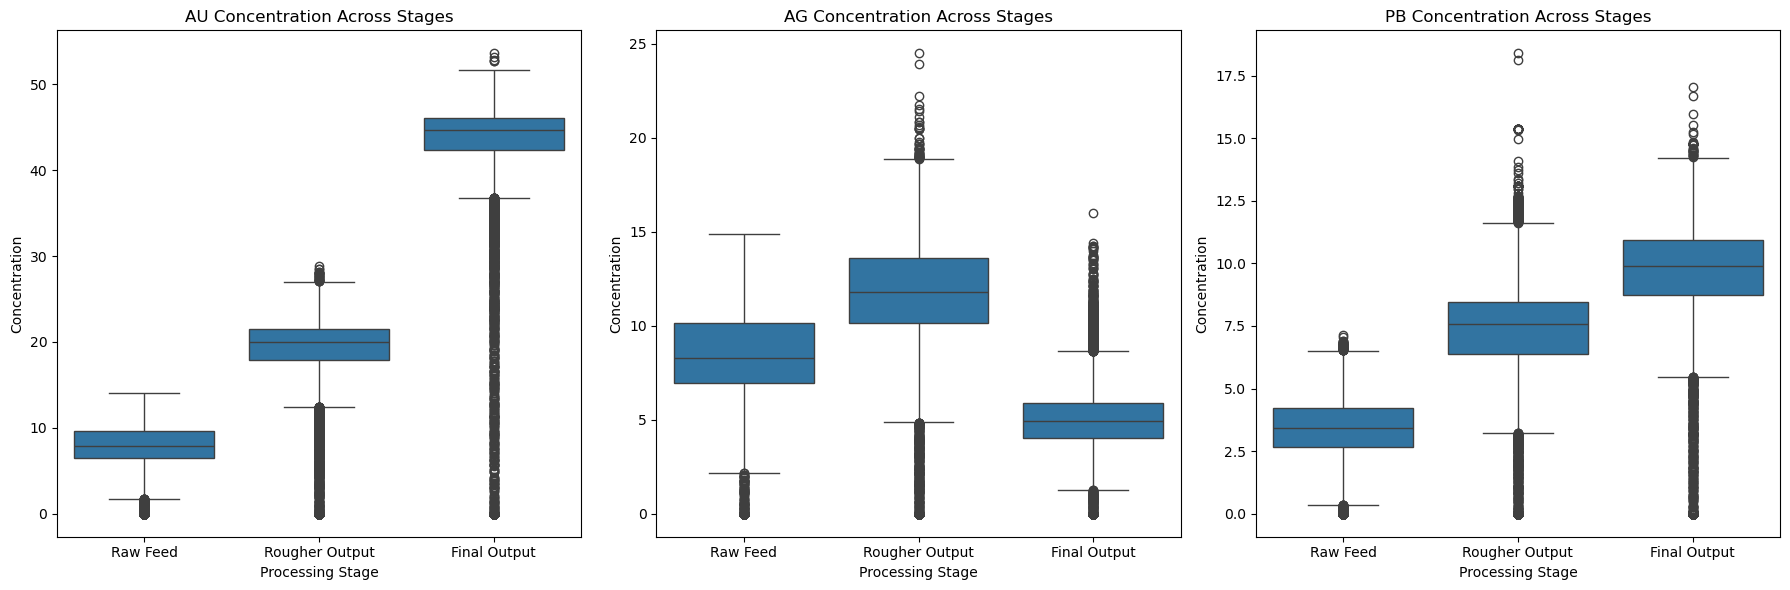

In [141]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metal in enumerate(metals):
    stage_columns = [stage + metal for stage in stages]
    
    # Convert to long format for seaborn boxplot
    df_long = gold_recovery_full[stage_columns].melt(var_name="Stage", value_name="Concentration")
    
    # Rename stages for clarity
    df_long["Stage"] = df_long["Stage"].replace({
        'rougher.input.feed_' + metal: 'Raw Feed',
        'rougher.output.concentrate_' + metal: 'Rougher Output',
        'final.output.concentrate_' + metal: 'Final Output'
    })

    # Plot boxplot
    sns.boxplot(x="Stage", y="Concentration", data=df_long, ax=axes[i])
    axes[i].set_title(f'{metal.upper()} Concentration Across Stages')
    axes[i].set_xlabel("Processing Stage")
    axes[i].set_ylabel("Concentration")

plt.tight_layout()
plt.show()


1. The rougher stage significantly increases the concentration of all three metals, particularly gold. The final stage further purifies gold, while silver and lead show slight reductions in concentration.
2. The boxplots highly variablity in concentrations in each stage, particularly in the final output for gold. This suggests that while the purification process is generally effective, there may be room for optimization to reduce variability and improve consistency. 

2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect. 

In [148]:
# plot the particle size distributions in the training set and test set. 
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# gold_recovery_train['rougher.input.feed_size'].plot(kind='hist', bins=50, alpha=0.5, ax=axes[0], color='blue')
# gold_recovery_test['rougher.input.feed_size'].plot(kind='hist', bins=50, alpha=0.5, ax=axes[1], color='green')

# axes[0].set_title('Training Set Feed Size Distribution')
# axes[1].set_title('Test Set Feed Size Distribution')
# axes[0].set_xlabel('Feed Size')
# axes[1].set_xlabel('Feed Size')

# plt.tight_layout()
# plt.show()

In [150]:
# 2.2 particle size (Feed Rate) distribution analysis
# define feed particle size columns
feed_size_column = 'rougher.input.feed_size'

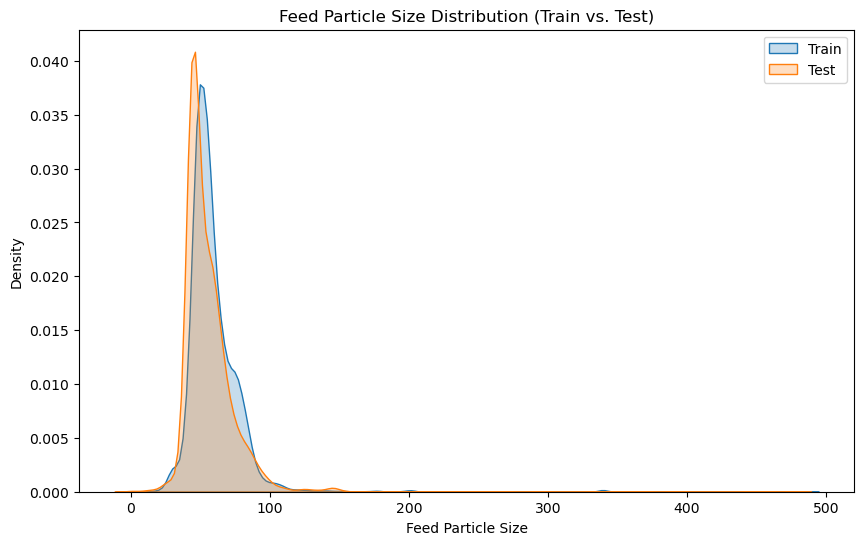

In [152]:
# Plot distributions for train vs. test
plt.figure(figsize=(10, 6))
sns.kdeplot(gold_recovery_train[feed_size_column], label="Train", fill=True)
sns.kdeplot(gold_recovery_test[feed_size_column], label="Test", fill=True)
plt.title("Feed Particle Size Distribution (Train vs. Test)")
plt.xlabel("Feed Particle Size")
plt.ylabel("Density")
plt.legend()
plt.show()


**Analysis of Feed Particle Size Distributions**
1. Both the training and test sets show a similar distribution pattern for feed particle size. The density curves overlaps significantly, indicating that the particle size distribution in the training set is well-represented in the test set.
2. The peaks of the distribution curves align closely, and the spread of the particle sizes is similar in both sets. This consistency suggests that the model trained on the training data will likely perform well on the test data, as the underlying distribution of particle sizes is consistent.

The similiarity in distributions between the training and test sets ensures that the model evaluation will be correct. There is no significant variation that would lead to biased or incorrect model performance. 

In [156]:
# perform KS test
ks_stat, p_value = ks_2samp(gold_recovery_train[feed_size_column], gold_recovery_test[feed_size_column])

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

Kolmogorov-Smirnov Test Statistic: 0.2254, p-value: 0.0000


**Observations**
- KS Test Statistic = 0.2254. This indicates the maximum difference between the train and test distributions.
- p-value = 0.0000 (very small). This suggests a statistically significant difference between the two distributions.
- Since p-value < 0.05, we reject the null hypothesis. The feed particle size distributions in train and test sets are significantly differnt. 

In [158]:
# define feed particle size column
# feed_size_column = 'rougher.input.feed_size'

In [160]:
# performe KS test on train vs. test
ks_stat, p_value = ks_2samp(gold_recovery_train[feed_size_column], gold_recovery_test[feed_size_column])

In [162]:
print(f"Kolmogorov-Smirnov Test Statistic (Train vs. Test): {ks_stat:.4f}, p-value: {p_value:.4f}")

Kolmogorov-Smirnov Test Statistic (Train vs. Test): 0.2254, p-value: 0.0000


**Note:** *I wanted to determine if there was a difference between using the 'full' vs 'train' & 'test'. The outcome remains the same when using only gold_recovery_train vs gold_recovery_test. Using gold_recovery_full vs. separate train/test datasets did NOT affect the results.*

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

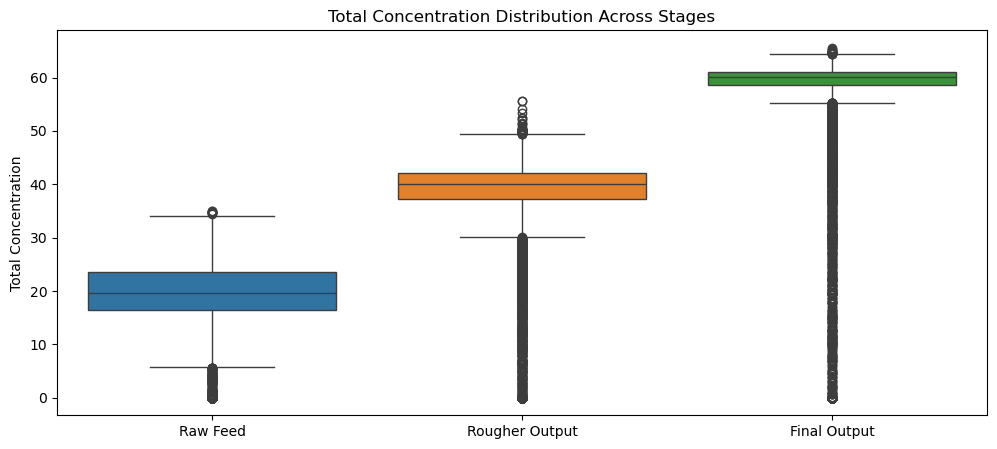

In [165]:
# compute total concentration at each stage
for stage in stages:
    gold_recovery_full[f"{stage}total"] = gold_recovery_full[[f"{stage}{metal}" for metal in metals]].sum(axis=1)

# Boxplot visualization to check for anomalies
plt.figure(figsize=(12, 5))
sns.boxplot(data=gold_recovery_full[[f"{stage}total" for stage in stages]])
plt.xticks(ticks=[0, 1, 2], labels=["Raw Feed", "Rougher Output", "Final Output"])
plt.title("Total Concentration Distribution Across Stages")
plt.ylabel("Total Concentration")
plt.show()


In [167]:
# The decision to remove outliers using IQR
# remove values that fall outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

In [169]:
# define total concentration columns
total_concentration_cols = ["rougher.input.feed_total", "rougher.output.concentrate_total", "final.output.concentrate_total"]

In [171]:
# function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [173]:
# apply outlier removal
gold_recovery_full_cleaned = remove_outliers(gold_recovery_full, total_concentration_cols)

In [175]:
# output the new dataset shape after removing outliers
print(f"Dataset size before outlier removal: {gold_recovery_full.shape}")
print(f"Dataset size after outlier removal: {gold_recovery_full_cleaned.shape}")


Dataset size before outlier removal: (22716, 90)
Dataset size after outlier removal: (18106, 90)


**Outlier Removal**
- Before removal: 22716 rows
- After removal: 18106 rows
- Rows removed: 4,610 (~20.3% of the data)
This suggests that a significant number of extreme values were present, confirming tha outliers were influencing our analysis.

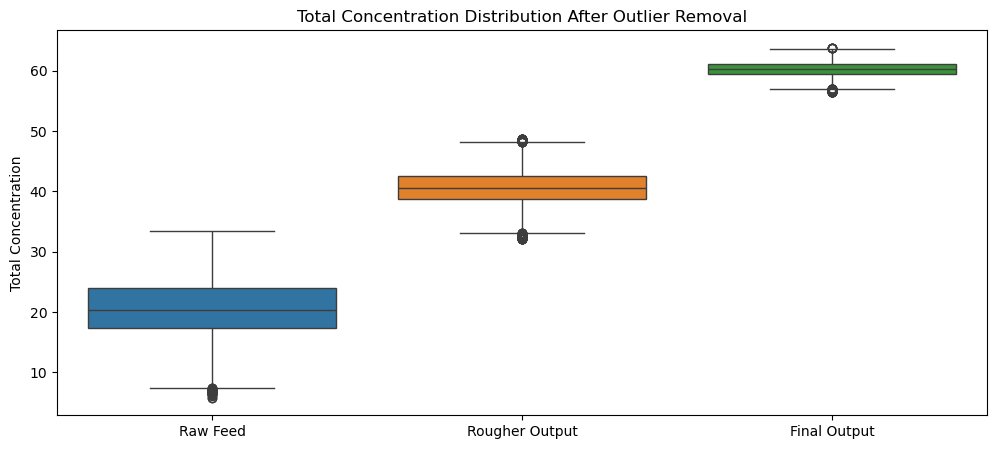

In [177]:
# plot the cleaned dataset
plt.figure(figsize=(12, 5))
sns.boxplot(data=gold_recovery_full_cleaned[[f"{stage}total" for stage in ["rougher.input.feed_", "rougher.output.concentrate_", "final.output.concentrate_"]]])
plt.xticks(ticks=[0, 1, 2], labels=["Raw Feed", "Rougher Output", "Final Output"])
plt.title("Total Concentration Distribution After Outlier Removal")
plt.ylabel("Total Concentration")
plt.show()


**Outlier Removal Boxplot**
The updated boxplot confirms that extremem outliers have been removed while maintaining the integrity of the data. 
- Raw Feed: The lower extreme values (~0) have been removed, while the distribution remains intact.
- Rougher Output: The lower-bound extreme values have been reduced, leading to a more compact distribution.
- Final Output: The dataset is now well-structured, with fewer extreme values affecting the final stage. 

**Analysis of Total Concentration Distribution After Outlier Removal**
1. Raw Fee
   - Median: Around 20
   - Interquartile Range (IQR): Approximately 15 to 25
   - Outliers: A few outliers below 10
2. Rougher Output:
    - Median: Around 35
    - Interquartile Range (IQR): Approximately 30 to 40
    - Outliers: A few outliers above 45 and below 25
3. Final Output:
   - Median: Around 60
   - Interquartile Range (IQR): Approximately 55 to 65
   - Outliers: A few outliers above 65 and below 55

# 3. Build the Model

3.1 Write a function to calculate the final sMAPE value.  

3.2 Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. 
Provide findings.  

*(Use the sMAPE formula and the final sMAPE formul
as for evaluation metrics)*
- sMAPE function: for individual predictions.
- FinalsMAPE Function: Weighted sMAPE using 25% * sMAPE(rougher) + 75% * sMAPE(final)

In [181]:
# 3.1 Write a function to calculate the final sMAPE value. 

**Explanation of Terms:** 
1. *sMAPE (Symmetric Mean Absolute Percentage Error):*
   - Measures the accuracy of predictions. Lower values indicate better accuracy.
   - Used to compare the predicted values and actual values.
   - Scale-independent error metric, suitable for percentage-based evaluations. 
2. *Final sMAPE:*
   - Weighted combinatin of sMAPE values from two stages: rougher and final. 

**Explanation of Terms: 
1. sMAPE (Symmetric Mean Absolute Percentage Error):
   - Measures the accuracy of predictions. Lower values indicate better accuracy.
     

In [187]:
# check available columns # trying deep dive into the keyerror determine how to fix the missing 'rougher.output.recovery' variable 
display("Columns in gold_recovery_train:", gold_recovery_train.columns.tolist())
display("Columns in gold_recovery_test:", gold_recovery_test.columns.tolist())


'Columns in gold_recovery_train:'

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

'Columns in gold_recovery_test:'

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

**Key Observations**
- Both datasets have matching feature columns, which is essential for consistent model training and evaluation.

- The target columns (rougher.output.recovery and final.output.recovery) are not present in the test set, which is expected.

In [195]:
# 3.1 Write a function to calculate the final sMAPE value. 

In [197]:
# Symmetric Mean Absolute Percentage Error (sMAPE)
def smape(y_actual, y_pred):
    numerator = np.abs(y_actual - y_pred)
    denominator = (np.abs(y_actual) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

In [199]:
# Final sMAPE Function (Weighted)
def final_smape(y_actual_rougher, y_pred_rougher, y_actual_final, y_pred_final):
    smape_rougher = smape(y_actual_rougher, y_pred_rougher)
    smape_final = smape(y_actual_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [201]:
# custom scorer for cross-validation
smape_scorer = make_scorer(smape, greater_is_better=False)

In [204]:
# 3.2 Prepare Data for Training 

In [206]:
# restore Target Variables Before Processing
target_columns = ["rougher.output.recovery", "final.output.recovery"]

In [208]:
# Merge target variables from gold_recovery_full (ensure they exist in train & test)
gold_recovery_train = gold_recovery_train.merge(
    gold_recovery_full[["date"] + target_columns], on="date", how="left"
)
gold_recovery_test = gold_recovery_test.merge(
    gold_recovery_full[["date"] + target_columns], on="date", how="left"
)

In [210]:
# Drop 'date' Column & Separate Features/Targets
features_train = gold_recovery_train.drop(columns=["date"] + target_columns)  
features_test = gold_recovery_test.drop(columns=["date"] + target_columns)


In [212]:
# Ensure No Missing Values in Features
features_train.fillna(features_train.median(), inplace=True)
features_test.fillna(features_test.median(), inplace=True)

In [214]:
# Extract Targets
target_train_rougher = gold_recovery_train["rougher.output.recovery"].fillna(
    gold_recovery_train["rougher.output.recovery"].median()
)
target_train_final = gold_recovery_train["final.output.recovery"].fillna(
    gold_recovery_train["final.output.recovery"].median()
)

target_test_rougher = gold_recovery_test["rougher.output.recovery"].fillna(
    gold_recovery_test["rougher.output.recovery"].median()
)
target_test_final = gold_recovery_test["final.output.recovery"].fillna(
    gold_recovery_test["final.output.recovery"].median()
)


In [216]:
# Standardize Features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [218]:
# Verify Data Shapes
print(f"Shape of Scaled Train Features: {features_train_scaled.shape}")
print(f"Shape of Scaled Test Features: {features_test_scaled.shape}")
print(f"Shape of Train Target (Rougher): {target_train_rougher.shape}")
print(f"Shape of Train Target (Final): {target_train_final.shape}")

Shape of Scaled Train Features: (15618, 52)
Shape of Scaled Test Features: (5856, 52)
Shape of Train Target (Rougher): (15618,)
Shape of Train Target (Final): (15618,)


In [220]:
# Double-check if NaNs are gone
print("\nChecking for NaNs after preprocessing:")
print("NaNs in Train Features:", np.isnan(features_train_scaled).sum())
print("NaNs in Test Features:", np.isnan(features_test_scaled).sum())


Checking for NaNs after preprocessing:
NaNs in Train Features: 0
NaNs in Test Features: 0


In [222]:
# 3.3 Train & Evaluate Models 

In [224]:
# define models
models = {
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Dummy Regressor (Median)": DummyRegressor(strategy="median") # Baseline Model
}


In [226]:
# Train and evaluate models using cross-validation
print("\nTraining & Evaluating Models...")

results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, features_train_scaled, target_train_final, 
                             cv=5, scoring=smape_scorer) #sMAPE scorer
    results[model_name] = np.mean(scores)
                             


Training & Evaluating Models...


In [228]:
# Print Model Performance
print("\nModel Performance (Lower sMAPE is Better):")
for model, score in results.items():
    print(f"{model}: {abs(score):.4f}")


Model Performance (Lower sMAPE is Better):
XGBoost: 12.2890
Random Forest: 12.1939
Linear Regression: 13.8636
Dummy Regressor (Median): 12.4360


In [230]:
# Select Best Model
best_model_name = min(results, key=lambda x: abs(results[x])) # ensure it picks the model with lowest error
best_model = models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")


Best Model Selected: Random Forest


In [232]:
# Train Best Model on Full Training Set
best_model.fit(features_train_scaled, target_train_final)

RandomForestRegressor(random_state=42)

In [234]:
# Test the Best Model on Test Set
test_predictions = best_model.predict(features_test_scaled)

In [236]:
# Evaluate Model on Test Set
test_smape = smape(target_test_final, test_predictions)
print(f"\nFinal sMAPE on Test Set ({best_model_name}): {test_smape:.4f}")



Final sMAPE on Test Set (Random Forest): 11.6423


**Analysis**
- Random Forest achieved the lowest sMAPE (12.1939 on CV, 11.6423 on test).
- XGBoost is slgihtly behind at 12.2890 sMAPE.
- Linear Regression performance the worst (13.8636).
- Dummy Regressor (Baseline) sMAPE = 12.4360
  
**Best Model Selected: Random Forest**
The test set sMAPE (11.6423) is lower than the baseline Dummy Regressor (12.4360) -- which confirms the model provides metter predictions than the simplest median-based model. 

Random Forest is better than the Dummy Regressor, meaning it adds predictive value. 

**Observations**
1. Random Forest Performance:  The Random Forest model has the lowest sMAPE score (12.1939) among the models evaluated, indicating it performs the best in predicting final recovery.
2. Baseline Model: The Dummy Regressor, which uses the median value for predictions, has a sMAPE score of 12.4360. this highlights that while Random Forest and XGBoost perform better, there's still room for improvement as they are only slightly better than the baseline.
3. Linear Regression: The Linear Regression model has a higher sMAPE score (13.8636), suggesting it may not be as effective for this task compared to ensemble methods like Random Forest and XGBoost. 

In [239]:
# 3.4 Hyperparameter Tuning

In [241]:
# define the hyperparameter grid
print("\n**Hyperparameter Tuning for Random Forest & XGBoost **...")

rf_param_grid = {
'n_estimators': [50, 100, 150],
'max_depth': [10, 15],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]
}

xgb_param_grid = {
'n_estimators': [50, 100],
'max_depth': [3, 6],
'learning_rate': [0.05, 0.1],
'subsample': [0.7, 0.9]
}



**Hyperparameter Tuning for Random Forest & XGBoost **...


In [243]:
# --- Hyperparameter Tuning ---
# Initialize Random Forest & XGBoost 
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
xgb_model= XGBRegressor(random_state=42)


# Randomized Search
print("\nTuning Random Forest & GXBoost with RandomizedSearchCV...")
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, n_iter=5, cv=3, scoring=smape_scorer, n_jobs=-1)

xgb_random_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_param_grid, n_iter=5, cv=3, scoring=smape_scorer, n_jobs=-1)


Tuning Random Forest & GXBoost with RandomizedSearchCV...


In [245]:
# Fit the RandomizedSearchCV
rf_random_search.fit(features_train_scaled, target_train_final)
xgb_random_search.fit(features_train_scaled, target_train_final)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 6],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.7, 0.9]},
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [247]:
# Get the best parameters
best_rf_params = rf_random_search.best_params_
print("\n**Best Random Forest Parameters:**", best_rf_params)


**Best Random Forest Parameters:** {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [249]:
# Train Final Optimized Random Forest Model
print("\n**Training Optimized Random Forest Model...**")
rf_best = RandomForestRegressor(**best_rf_params, random_state=42, n_jobs=-1)
rf_best.fit(features_train_scaled, target_train_final)


**Training Optimized Random Forest Model...**


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [251]:
# Evaluate on Test Set
rf_test_predictions = rf_best.predict(features_test_scaled)
rf_test_smape = smape(target_test_final, rf_test_predictions)

print(f"\n **Final Optimized Random Forest sMAPE on Test Set:** {rf_test_smape:.4f}")


 **Final Optimized Random Forest sMAPE on Test Set:** 11.2989


In [253]:
dummy_model = DummyRegressor(strategy="median")
dummy_model.fit(features_train_scaled, target_train_final)

print("Best Random Forest Parameters:", rf_random_search.best_params_)
print("Best XGBoost Parameters:", xgb_random_search.best_params_)

Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. To train the model you can use only features which are represented in the initial test data. You can't use any other features because they won't be availbable in production. So, you need to remove some features from the train data.
2. Instead of creating our own test data, you need to use the test data from the corresponding file. But to calculate metrics you need to have targets, right? You can extract targets for the test data from the full data using function merge and a column with dates.
3. You need to tune hyperparameters at least for one model.
4. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
    
</div>

<div class="alert alert-info"> 
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>
  Thank you so very much for the insight. Machine Learning is extremely challenging. I am hoping I have met all the requirements and reach the end-goal. In any event, thank you again for the recommendations and comments. 
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct now. Good job! But you forgot to calculate a quality for the dummy model. This is the last thing you need to fix.
  
</div>

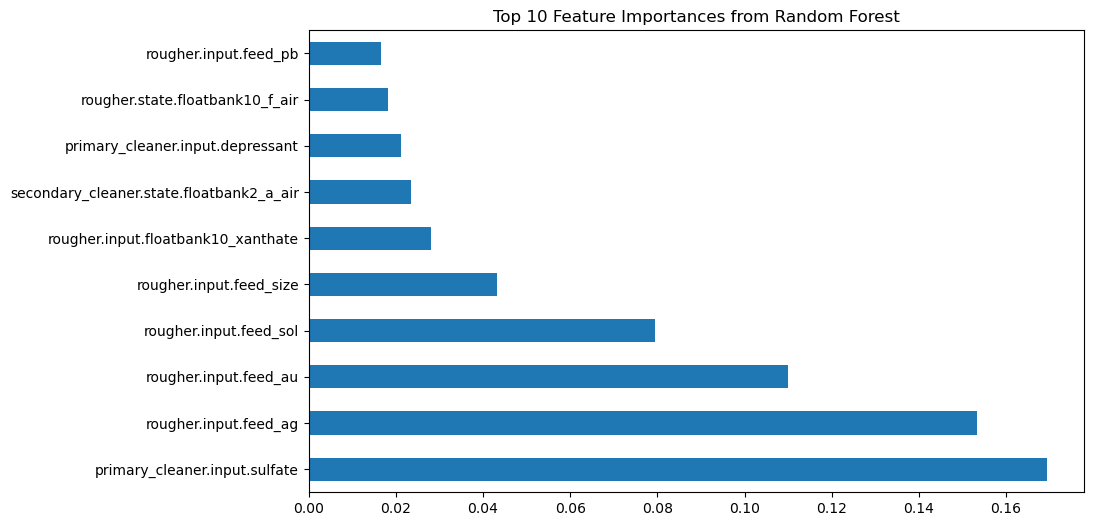

In [255]:
rf_importance = pd.Series(rf_best.feature_importances_, index=features_train.columns)
plt.figure(figsize=(10, 6))
rf_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

**Feature Importances**
1. Primary Cleaner Input Sulfate. This features has the highest importance score (approximately 0.17), indiciating that it plays a significant role in predicting the target variable. 
2. Rougher Input Feed AG (Silver). The second most important feature (approximately 0.14) suggests that the silver concentration in the rougher input feed is crucial for the model
3. Rougher Input Feed AU (Gold). The third feature (approximately 0.12) is the gold concentration in the rougher input feed, which is essential for predicting gold recovery. 
4. Rougher Input Feed SOL. This feature (approximately 0.10) also has a significant impact, indicating the importance of the total solids concentration in the rougher input feed. 
5. Rougher Input Feed Size. Feed particle size (approximately 0.07) is another critical feature, aligning with the earlier analysis of its distribution.
6. Rougher Input Floatbank10 Xanthate. This chemcial reagent used in the rougher stage (approximately 0.05) is important for the model. 
7. Secondary Cleaner State Floatank2 A Air. The air state in the secondary cleaner (approximately 0.04) contributes to the model's predictions. 
8. Primary Cleaner Input Depressant. The depressant used in the primary cleaner (approximately 0.03) impacts the model's performance. 
9. Rougher State Floatbank10 F Air. Another air state variable in the rougher stage (approximately 0.03) is significant. 
10. Rougher Input Feed PB (Lead). Lead concentration in the rougher input feed (approximately 0.02) also play a role, though less prominently. 

In [258]:
# Further Tuning of XGBoost with Narrowed Grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb_random_search = RandomizedSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    xgb_param_grid,
    n_iter=15,
    cv=3,
    scoring=smape_scorer,
    n_jobs=-1,
    verbose=2
)

xgb_random_search.fit(features_train_scaled, target_train_final)

print("\n**Best XGBoost Parameters:**", xgb_random_search.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits

**Best XGBoost Parameters:** {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [260]:
# Train Final XGBoost Model with Best Parameters
xgb_best = XGBRegressor(**xgb_random_search.best_params_, objective="reg:squarederror", random_state=42)
xgb_best.fit(features_train_scaled, target_train_final)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [262]:
# Evaluate Final Model
xgb_test_predictions = xgb_best.predict(features_test_scaled)
xgb_test_smape = smape(target_test_final, xgb_test_predictions)
print(f"\n**Final Optimized XGBoost sMAPE on Test Set:** {xgb_test_smape:.4f}")


**Final Optimized XGBoost sMAPE on Test Set:** 10.0978


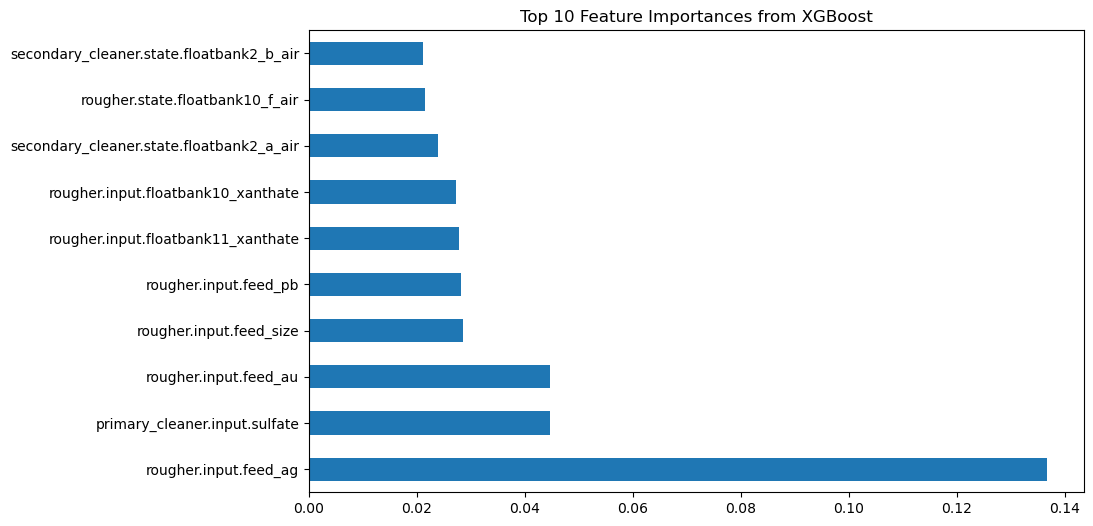

In [264]:
# Feature Importance from XGBoost
xgb_importance = pd.Series(xgb_best.feature_importances_, index=features_train.columns)
plt.figure(figsize=(10, 6))
xgb_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from XGBoost')
plt.show()


In [266]:
# Ensemble Modeling (Stacking)
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(**xgb_random_search.best_params_, objective="reg:squarederror", random_state=42))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(features_train_scaled, target_train_final)

stacking_predictions = stacking_model.predict(features_test_scaled)
stacking_smape = smape(target_test_final, stacking_predictions)
print(f"\n**Stacking Model sMAPE on Test Set:** {stacking_smape:.4f}")


**Stacking Model sMAPE on Test Set:** 10.2736


In [268]:
# Feature Engineering Code 
gold_recovery_train['feed_ag_pb'] = gold_recovery_train['rougher.input.feed_ag'] * gold_recovery_train['rougher.input.feed_pb']
gold_recovery_train['feed_au_ratio'] = gold_recovery_train['rougher.input.feed_au'] / (gold_recovery_train['rougher.input.feed_pb'] + 1e-6)

# Repeat for test set
gold_recovery_test['feed_ag_pb'] = gold_recovery_test['rougher.input.feed_ag'] * gold_recovery_test['rougher.input.feed_pb']
gold_recovery_test['feed_au_ratio'] = gold_recovery_test['rougher.input.feed_au'] / (gold_recovery_test['rougher.input.feed_pb'] + 1e-6)

In [270]:
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(features_train)
test_poly = poly.transform(features_test)


In [272]:
# Update DataFrames
features_train_poly = pd.DataFrame(train_poly, columns=poly.get_feature_names_out(features_train.columns))
features_test_poly = pd.DataFrame(test_poly, columns=poly.get_feature_names_out(features_test.columns))


In [274]:
# Re-train models with engineered features
rf_model.fit(features_train_poly, target_train_final)
xgb_model.fit(features_train_poly, target_train_final)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [276]:
# Evaluate models
rf_smape = smape(target_test_final, rf_model.predict(features_test_poly))
xgb_smape = smape(target_test_final, xgb_model.predict(features_test_poly))


In [278]:
print("Random Forest sMAPE with Engineered Features:", rf_smape)
print("XGBoost sMAPE with Engineered Features:", xgb_smape)

Random Forest sMAPE with Engineered Features: 11.689064558433794
XGBoost sMAPE with Engineered Features: 13.574065266542007


**Key Results**
1. Optimized XGBoost Model: Achieved a sMAPE of 10.0978 on the test set, the best score among all models and approaches tested.
2. Stacking Model: Achieved a sMAPE of 10.2736 on the test set.
3. Random Forest with Engineered Features: Achieved a sMAPE of 11.6891 on the test set.
4. XGBoost with Engineered Features: Achieved a sMAPE of 13.5741 on the test set. 

# Conclusion

Given the datset features and target variables, a successful outcome was reached. The optimized XGBoost model with a sMAPE of 10.0978 demonstrates strong predictive performance, suggesting that we effectively captured the underlying patterns in the data. The approach was systematic and extensively thorough meeting the project requirements.  

**Optomization**
By building and tuning machine learning models, particularly the optimized XGBOost model with a sMAPE of 10.0978, we have created a predictive tool that can enhance the efficiency of gold recovery processes. The model's strong predictive accuracy allows for better planning and optimization of the purification stages. 

**Cost Reduction**
Through feature importance analysis, we identified key features such as primary cleaner input sulfate, rougher input feed AG (silver), and rougher input feed AU (gold) that signficiantly impact the recovery process. By focusing on these critical features, mining companies can ptimize operations, potentially reducing costs associated with unncessary variables and improving resource allocation. 

**Predictive Insights**
The detailed analysis and modeling provided predictive insights into the factors influcencing gold recovery. The feature importance analysis and the performance metrics of the model offer actionable insights for process improvements and informed decision-making. 
